<a href="https://colab.research.google.com/github/xknobm00/MPA-MLF/blob/main/CV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:

In [12]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data)
print(iris.target)
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

Split data into training and testing parts:

In [13]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(150, 4)
(135, 4)
(15, 4)
(135,)
(15,)
[0 0 2 1 2 1 2 0 2 1 1 1 1 2 2 2 1 2 1 0 0 1 0 2 2 1 1 2 2 1 0 0 0 2 1 1 2
 1 2 0 2 1 2 0 2 2 0 1 2 1 2 0 0 0 2 0 1 1 1 0 2 1 1 2 0 1 0 1 0 0 0 0 1 2
 0 2 1 2 1 1 2 1 2 2 0 1 0 1 0 0 2 1 2 2 0 1 0 0 2 2 2 0 1 1 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 2 2 0 2 1 1 1 0 1 1 2 0 0 2 0 2 2]


Use a Support Vector Machine for classification:

In [14]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

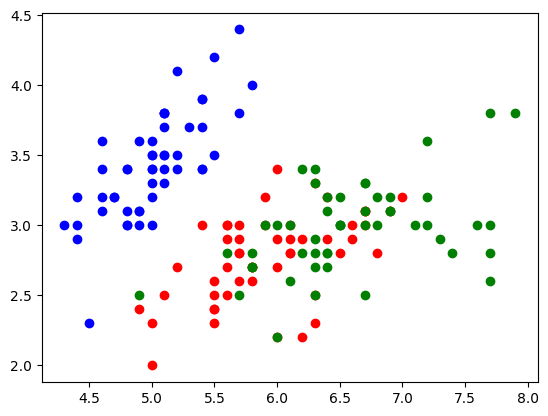

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0], X[y==0,1], color='blue')
plt.scatter(X[y==1,0], X[y==1,1], color='red')
plt.scatter(X[y==2,0], X[y==2,1], color='green')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [16]:
X=iris.data[iris.target!=2,0:2]
print(X.shape)
y=iris.target[iris.target!=2]
SVMmodel_1=SVC(kernel='linear')

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2)
SVMmodel_1.fit(X_train_1, y_train_1)
SVMmodel_1.score(X_test_1, y_test_1)

(100, 2)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:


[[ 2.02579735 -2.27901948]]
[-3.88692806]


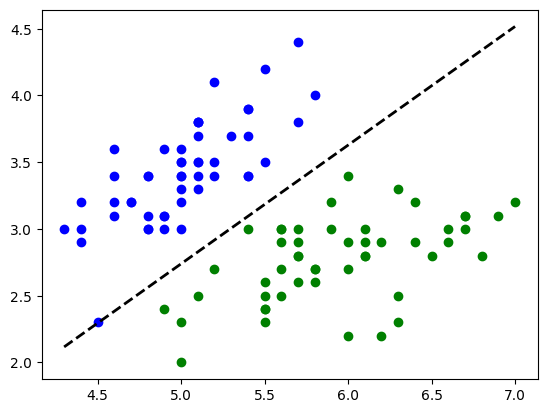

In [23]:
supvectors=SVMmodel_1.support_vectors_

W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_
print(W)
print(b)

import numpy as np
x1=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2 = -b/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(X[y==0,0], X[y==0,1], color='blue')
plt.scatter(X[y==1,0], X[y==1,1], color='green')
plt.plot(x1, x2, color='black', linewidth=2, linestyle='dashed')


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

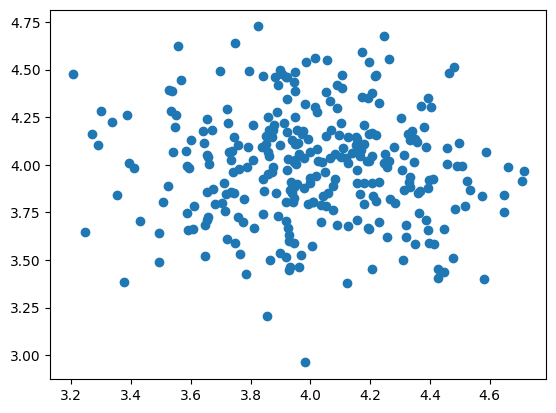

In [24]:

from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

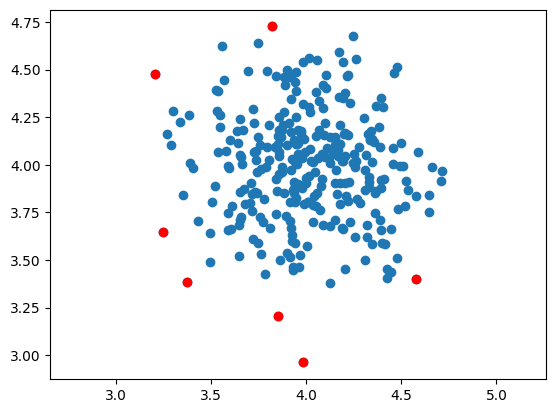

In [25]:

SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()


Plot the support vectors:

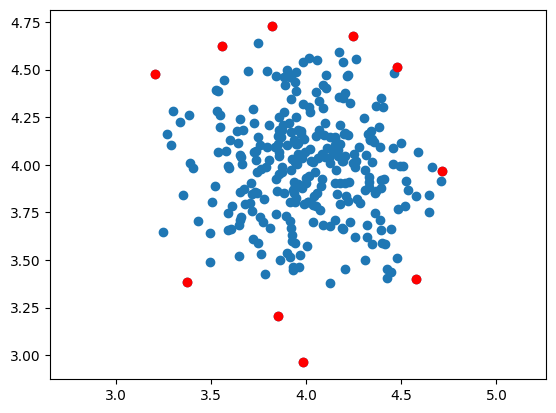

In [35]:
plt.scatter(x[:,0], x[:,1])
plt.axis('equal')
supvectors2= SVMmodelOne.support_vectors_
plt.scatter(supvectors2[:,0],supvectors2[:,1], color = 'red')

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


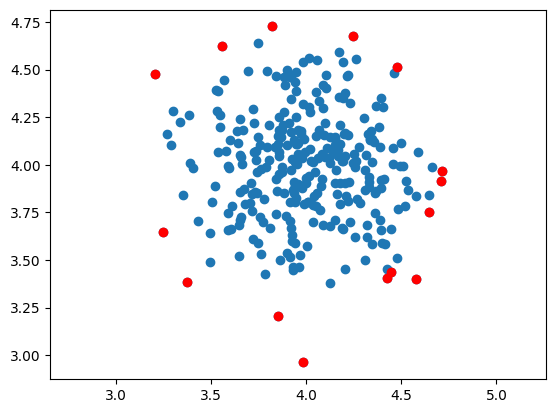

In [37]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()